# Fire Incidents in City of Pittsburgh
## Introduction


#### Our group decided our metric would be happiness. And the neighborhood with the least fires is the happiest right? Just look at that little dog down there. He's really trying to keep himself composed. I wouldn't want to live in his neighborhood!

#### The information used was collected from 2013 to the present, so everything discussed below is within this timeframe.


![dog](https://cdn.hashnode.com/res/hashnode/image/upload/v1658971443881/Q9WWvH0Cv.gif?auto=format,compress&gif-q=60&format=webm)

#### I'll start by showing the number of fire incidents in every neighborhood.

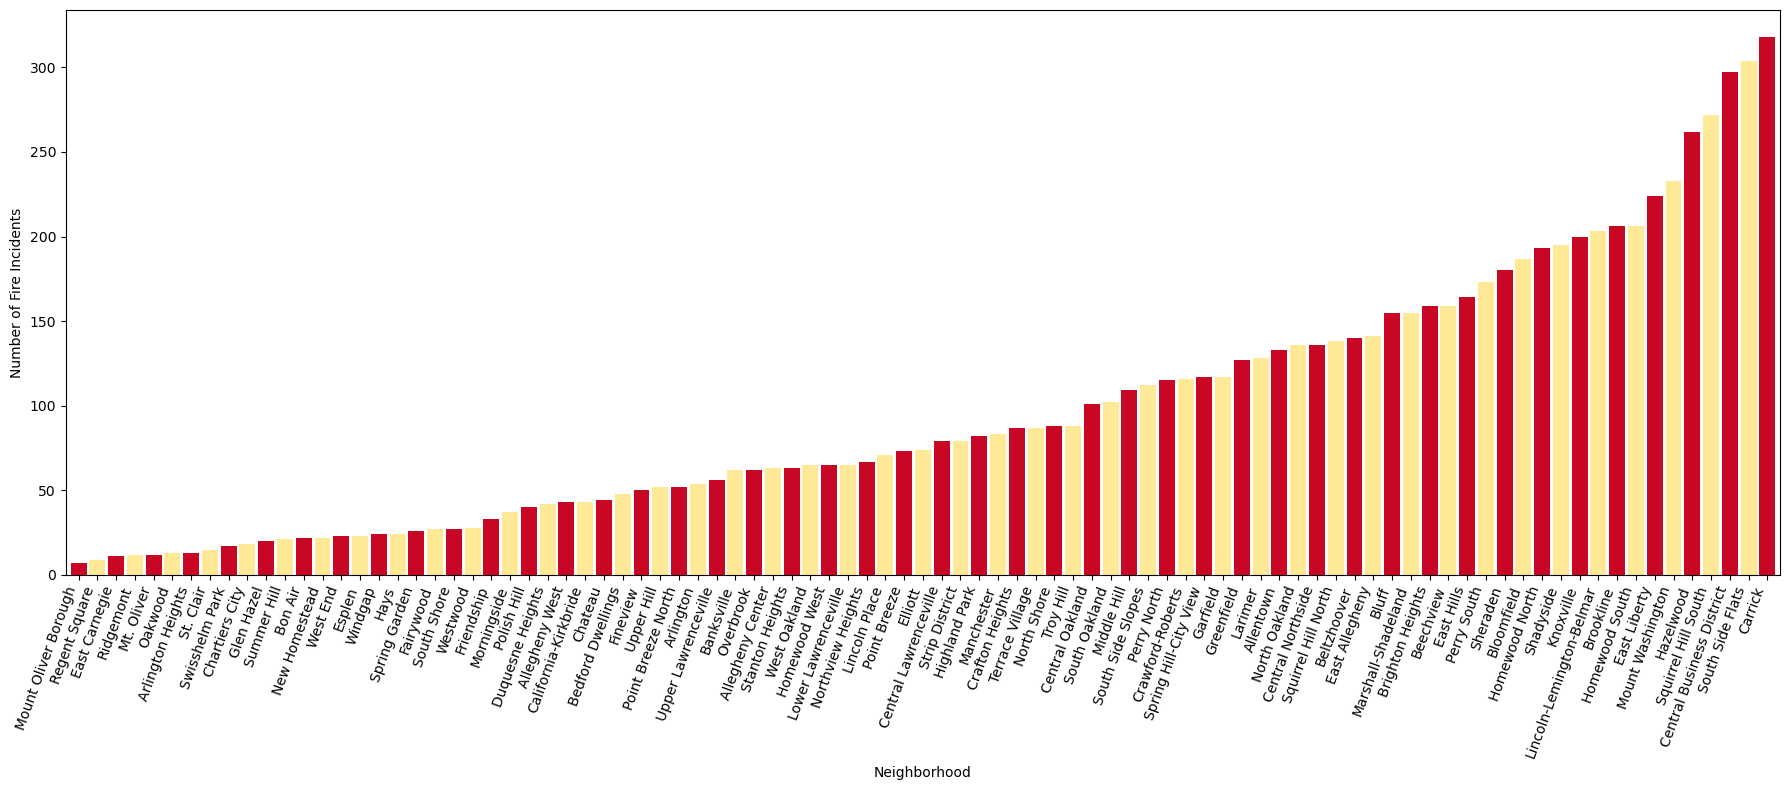

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("Fire_Incidents.csv")
fires = data['neighborhood'].value_counts().sort_values(ascending=True)
colors = ['#C70723' if i % 2 == 0 else '#FFE997' for i in range(len(fires))]
fires.plot(kind='bar', color=colors, figsize=(18, 8),width=0.85)
plt.xlabel("Neighborhood")
plt.ylabel("Number of Fire Incidents")
plt.xticks(rotation=70, ha='right')
plt.tight_layout()
plt.show()


#### Wow those are a lot of fires! I'd be pretty worried if I was in South Side Flats or Carrick! Lets's just focus on the fewest 10.

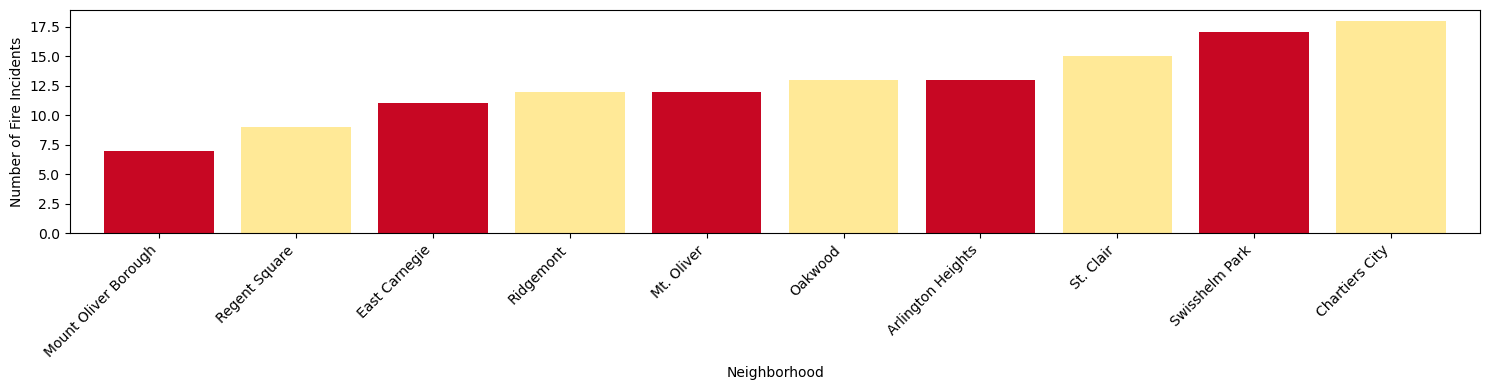

In [42]:
fires = data['neighborhood'].value_counts().sort_values(ascending=True).head(10)
colors = ['#C70723' if i % 2 == 0 else '#FFE997' for i in range(len(fires))]
fires.plot(kind='bar', color=colors, figsize=(15, 4), width=0.8)
plt.xlabel("Neighborhood")
plt.ylabel("Number of Fire Incidents")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [43]:
firetable = fires.reset_index()
firetable.columns = ['Neighborhood', '  Number of Incidents']
print(firetable.to_string(index=False))

        Neighborhood    Number of Incidents
Mount Oliver Borough                      7
       Regent Square                      9
       East Carnegie                     11
           Ridgemont                     12
          Mt. Oliver                     12
             Oakwood                     13
   Arlington Heights                     13
           St. Clair                     15
      Swisshelm Park                     17
      Chartiers City                     18


#### If our rating was based soley on the number of fires, Mount Oliver Borough would win with 7 incidents from 2013 until now. But couldn't happiness also be influenced by the intensity of fires within each neighborhood?

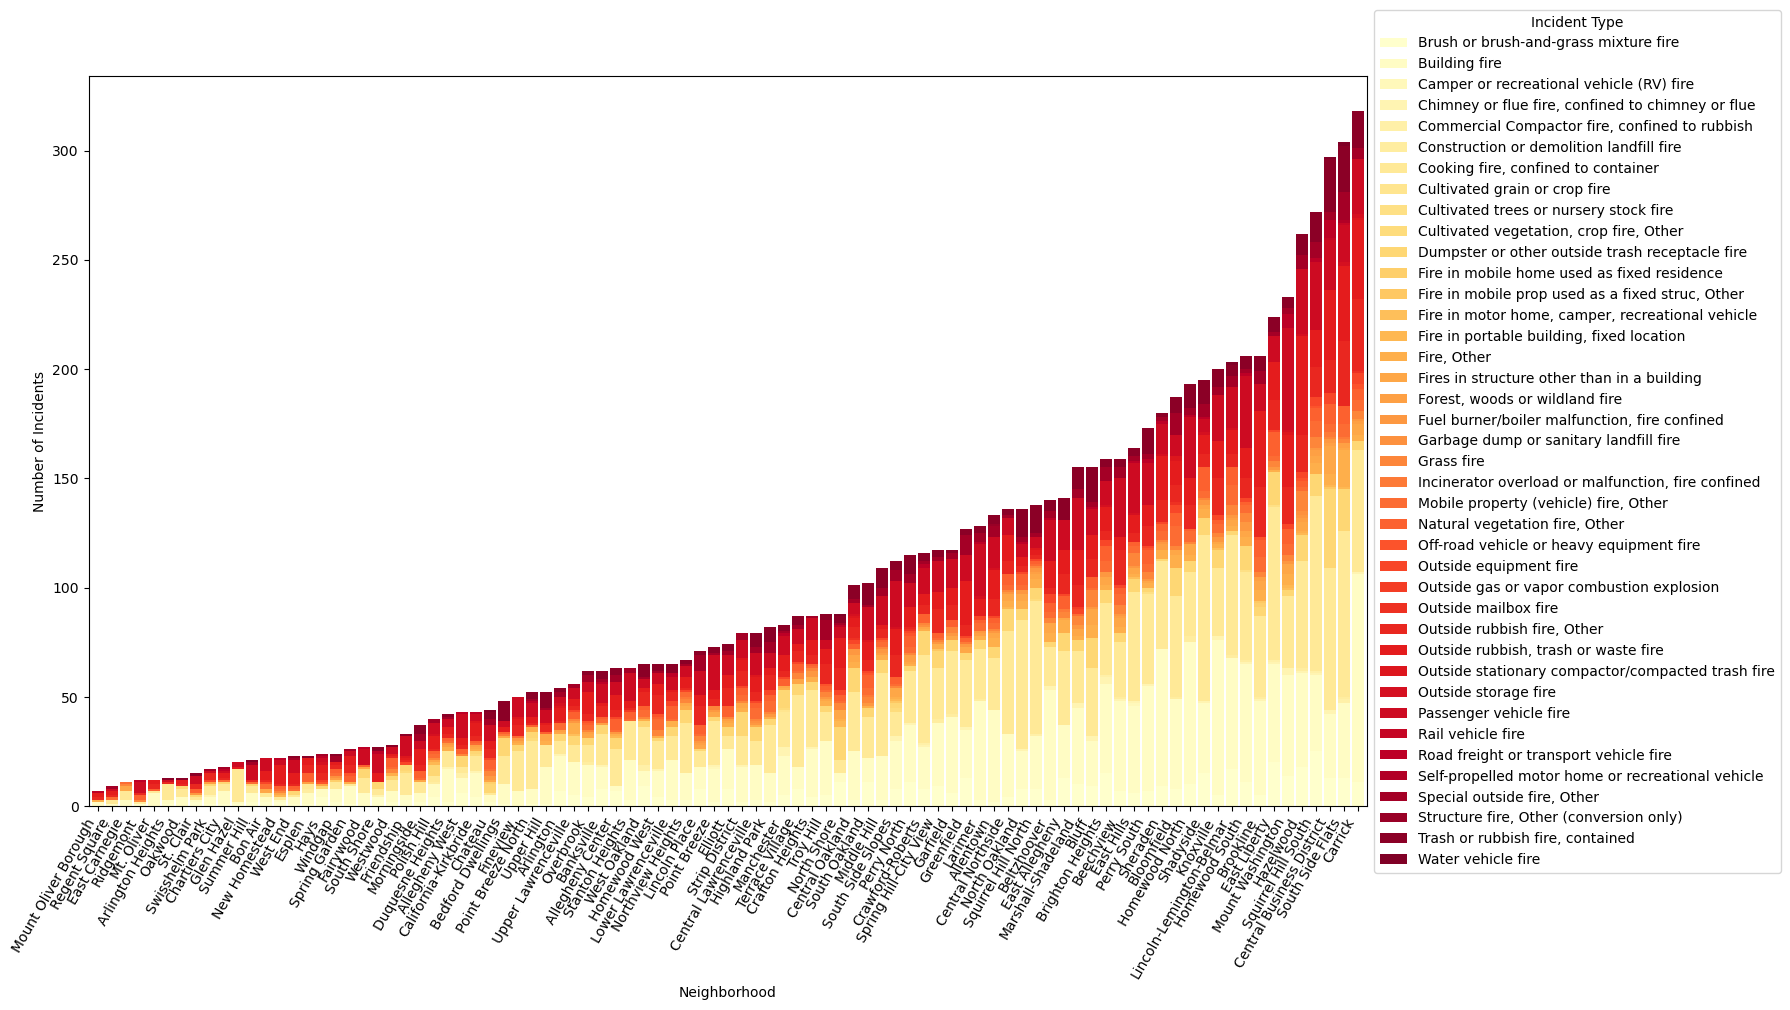

In [40]:
incidents = data.groupby(['neighborhood', 'type_description']).size().unstack(fill_value=0)
incidents = incidents.loc[incidents.sum(axis=1).sort_values(ascending=True).index]
incidents.plot(kind='bar',stacked=True,figsize=(18, 10),colormap='YlOrRd',width=0.85)
plt.xlabel("Neighborhood")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=60, ha='right')
plt.legend(title='Incident Type', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
plt.show()

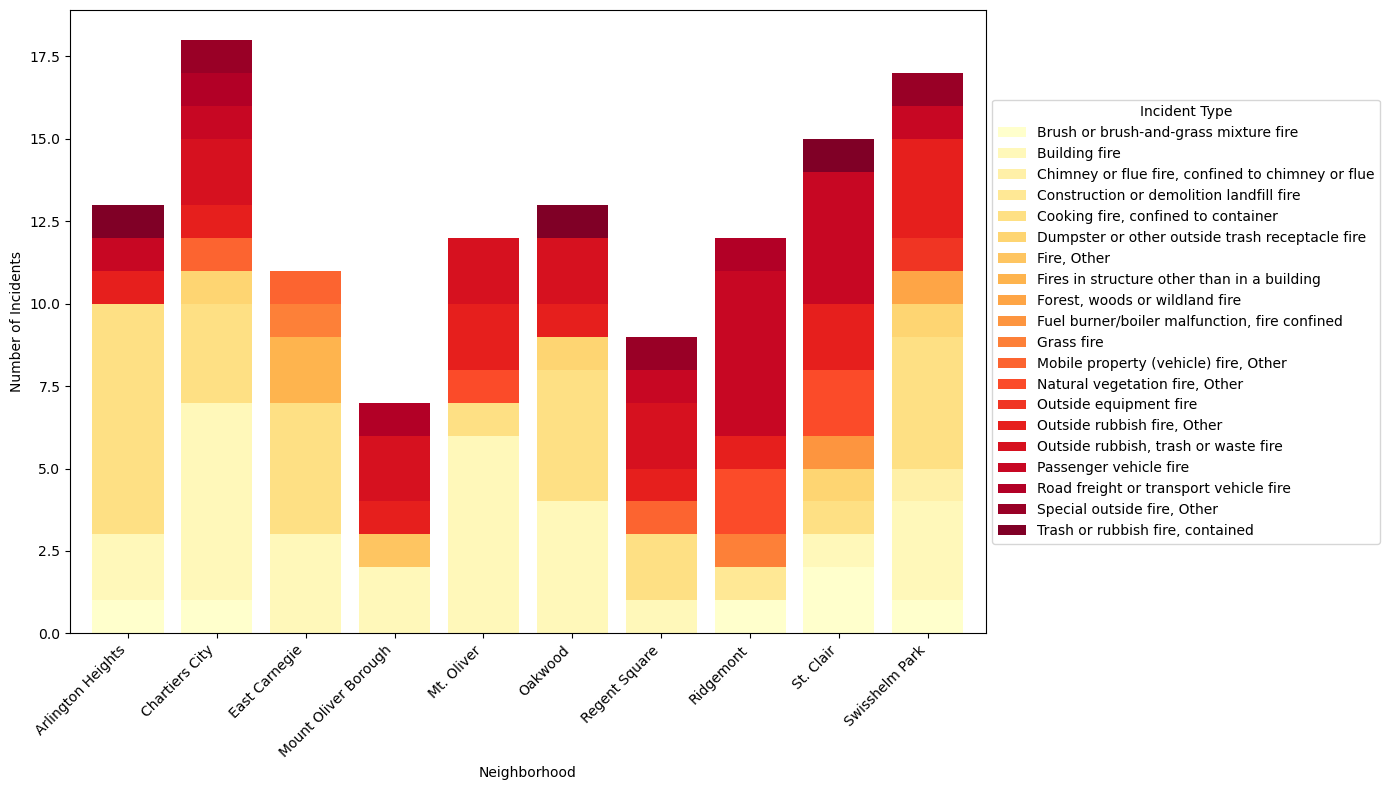

In [44]:
tenneighborhoods = data['neighborhood'].value_counts().sort_values().head(10).index
filterdata = data[data['neighborhood'].isin(tenneighborhoods)]
incidentbreakdown = filterdata.groupby(['neighborhood', 'type_description']).size().unstack(fill_value=0)
incidentbreakdown.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='YlOrRd', width=0.8)
plt.xlabel("Neighborhood")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Incident Type', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
plt.show()

#### A mailbox fire isn't going to be as deadly as an demolition fire, so let's assign some weights based on severity. This kind of thing can be pretty subjective. On average, I assigned most of the trash related fires to lower weights and ones related to vehicles or other heavy machinery to higher weights.

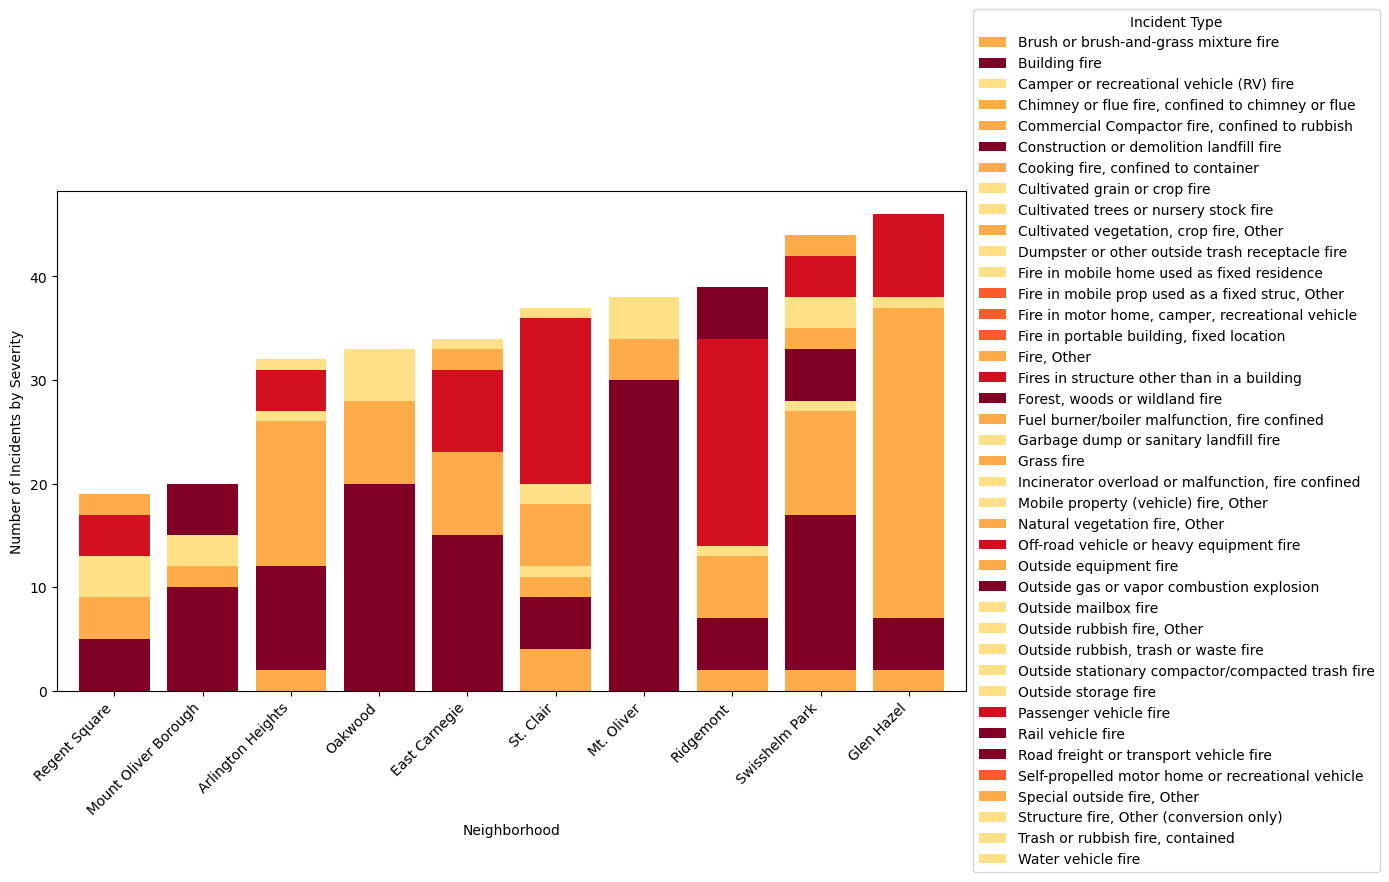

In [45]:
weights = {
    'Building fire': 5,
    'Passenger vehicle fire': 4,
    'Construction or demolition landfill fire': 5,
    'Commercial Compactor fire, confined to rubbish': 2,
    'Cooking fire, confined to container': 2,
    'Trash or rubbish fire, contained': 1,
    'Brush or brush-and-grass mixture fire': 2,
    'Forest, woods or wildland fire': 5,
    'Grass fire': 2,
    'Fuel burner/boiler malfunction, fire confined': 2,
    'Dumpster or other outside trash receptacle fire': 1,
    'Outside rubbish fire, Other': 1,
    'Outside rubbish, trash or waste fire': 1,
    'Fire, Other': 2,
    'Special outside fire, Other': 2,
    'Natural vegetation fire, Other': 2,
    'Off-road vehicle or heavy equipment fire': 4,
    'Rail vehicle fire': 5,
    'Road freight or transport vehicle fire': 5,
    'Self-propelled motor home or recreational vehicle': 3,
    'Fire in motor home, camper, recreational vehicle': 3,
    'Fire in mobile prop used as a fixed struc, Other': 3,
    'Fire in portable building, fixed location': 3,
    'Outside equipment fire': 2,
    'Fires in structure other than in a building': 4,
    'Chimney or flue fire, confined to chimney or flue': 2,
    'Outside gas or vapor combustion explosion': 5,
    'Cultivated vegetation, crop fire, Other': 2,
    'Outside mailbox fire': 1,
    'Water vehicle fire:': 2,
}
data['weights'] = data['type_description'].map(weights).fillna(1)
weighted = data.groupby(['neighborhood', 'type_description'])['weights'].sum().unstack(fill_value=0)
weighted = weighted.loc[weighted.sum(axis=1).sort_values(ascending=True).head(10).index]
incidenttypes = weighted.columns
colors = [plt.cm.YlOrRd(weights.get(i, 1) / 5) for i in incidenttypes]
weightgraph = weighted.plot(kind='bar', stacked=True, figsize=(14, 8), color=colors, width=0.8)
plt.xlabel("Neighborhood")
plt.ylabel("Number of Incidents by Severity")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Incident Type', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
plt.show()

#### Regent Square takes the win in this category, but Mount Oliver Borough isn't so far behind with second place.

## Conclusion
#### Based on these metrics, we can say that Mount Oliver Borough has the least fires, and low fire severity, which makes it the happiest neighborhood.

#### I've never been to Mount Oliver Borough, or much of anywhere in Pittsburgh, but it looks homey, and with all its trees it's a good thing there aren't many fires!